serialize NumPy array into JSON and write into a file
Done writing serialized NumPy array into file
########## COUNTS ###########
AH Counts:  799991
AV Counts:  799991
AD Counts:  799991
AA Counts:  799991
BH Counts:  799991
BV Counts:  799991
BD Counts:  799992
BA Counts:  799991
########## MAX/MIN PERIOD (Picoseconds) ###########
AH max:  1250.588      AH min:  1249.442
AV max:  1250.61      AV min:  1249.415
AD max:  1250.595      AD min:  1249.451
AA max:  1250.617      AA min:  1249.448
BH max:  1250.63      BH min:  1249.421
BV max:  1250.667      BV min:  1249.418
BD max:  1250.612      BD min:  1249.373
BA max:  1250.606      BA min:  1249.429
########## MAX/MIN ROUNDED PERIOD (Nanoseconds) ###########
AH max:  1251.0      AH min:  1249.0
AV max:  1251.0      AV min:  1249.0
AD max:  1251.0      AD min:  1249.0
AA max:  1251.0      AA min:  1249.0
BH max:  1251.0      BH min:  1249.0
BV max:  1251.0      BV min:  1249.0
BD max:  1251.0      BD min:  1249.0
BA max:  1251.0      

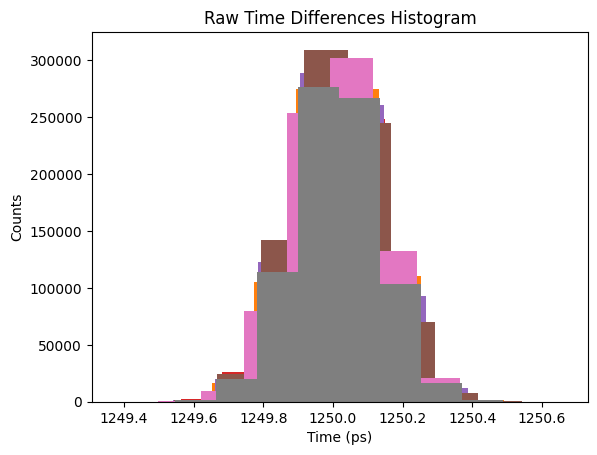

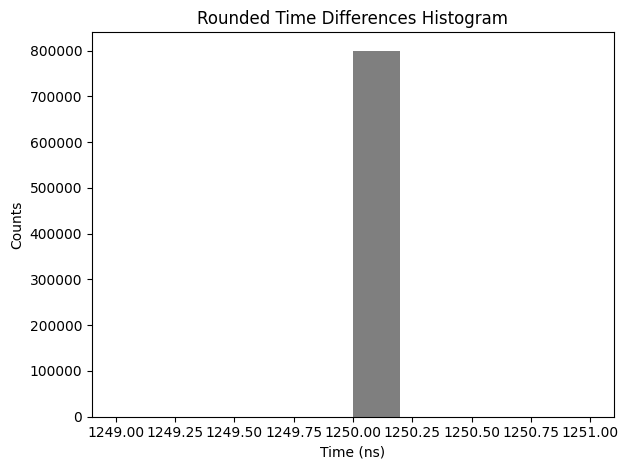

In [11]:
"""The TimeTagStream measurement class"""

import TimeTagger
import numpy as np
import matplotlib.pyplot as plt

#JSON file requirements########################
from json import JSONEncoder
import json

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)
################################################

n_channels = [1, 2, 3, 4, 5, 6, 7, 8];

# Create a TimeTagger instance to control your hardware
tagger = TimeTagger.createTimeTagger()

# Enable the test signal on channels 1-8
tagger.setTestSignal(n_channels, True)

#size of the buffer to store data (8*800KHz + cushion)
event_buffer_size = len(n_channels)*800000 + 5000;

stream = TimeTagger.TimeTagStream(tagger=tagger,
                                  n_max_events=event_buffer_size,
                                  channels= n_channels)
#Capture data for 1s (1e12 ps)
stream.startFor(int(1E12))

i = 0;
while stream.isRunning():
    #do nothing while collecting data
    i += 1;

# getData() does not return timestamps, but an instance of TimeTagStreamBuffer
# that contains more information than just the timestamp
data = stream.getData()

# With the following methods, we can retrieve a numpy array for the particular information:
channel = data.getChannels()            # The channel numbers
timestamps = data.getTimestamps()       # The timestamps in ps
# overflow_types = data.getEventTypes()   # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
# missed_events = data.getMissedEvents()  # The numbers of missed events in case of overflow
TimeTagger.freeTimeTagger(tagger)

#Access Individual channel tags
TT_Ch1 = timestamps[np.where(channel == 1)] #AH 
TT_Ch2 = timestamps[np.where(channel == 2)] #AV
TT_Ch3 = timestamps[np.where(channel == 3)] #AD
TT_Ch4 = timestamps[np.where(channel == 4)] #AA
TT_Ch5 = timestamps[np.where(channel == 5)] #BH
TT_Ch6 = timestamps[np.where(channel == 6)] #BV
TT_Ch7 = timestamps[np.where(channel == 7)] #BD
TT_Ch8 = timestamps[np.where(channel == 8)] #BA

#Save TimeTags to txt files

# Serialization
numpyData = {"Ch1": TT_Ch1, "Ch2": TT_Ch2, "Ch3": TT_Ch3, "Ch4": TT_Ch4, "Ch5": TT_Ch5, "Ch6": TT_Ch6, "Ch7": TT_Ch7, "Ch8": TT_Ch8}
print("serialize NumPy array into JSON and write into a file")
with open("Detector_Data.json", "w") as write_file:
    json.dump(numpyData, write_file, cls=NumpyArrayEncoder, indent = 4, sort_keys = True)
print("Done writing serialized NumPy array into file")

#Get the number of counts in each channel
Counts_Ch1 = len(TT_Ch1);
Counts_Ch2 = len(TT_Ch2);
Counts_Ch3 = len(TT_Ch3);
Counts_Ch4 = len(TT_Ch4);
Counts_Ch5 = len(TT_Ch5);
Counts_Ch6 = len(TT_Ch6);
Counts_Ch7 = len(TT_Ch7);
Counts_Ch8 = len(TT_Ch8);

print("########## COUNTS ###########")
print("AH Counts: ", Counts_Ch1);
print("AV Counts: ", Counts_Ch2);
print("AD Counts: ", Counts_Ch3);
print("AA Counts: ", Counts_Ch4);
print("BH Counts: ", Counts_Ch5);
print("BV Counts: ", Counts_Ch6);
print("BD Counts: ", Counts_Ch7);
print("BA Counts: ", Counts_Ch8);

#Get the time diffrences between counts for each channel (i.e. the period for each channel in picoseconds)
period_Ch1 = np.diff(TT_Ch1)/1000;
period_Ch2 = np.diff(TT_Ch2)/1000;
period_Ch3 = np.diff(TT_Ch3)/1000;
period_Ch4 = np.diff(TT_Ch4)/1000;
period_Ch5 = np.diff(TT_Ch5)/1000;
period_Ch6 = np.diff(TT_Ch6)/1000;
period_Ch7 = np.diff(TT_Ch7)/1000;
period_Ch8 = np.diff(TT_Ch8)/1000;

print("########## MAX/MIN PERIOD (Picoseconds) ###########")
print("AH max: ", np.max(period_Ch1), "     AH min: ", np.min(period_Ch1))
print("AV max: ", np.max(period_Ch2), "     AV min: ", np.min(period_Ch2))
print("AD max: ", np.max(period_Ch3), "     AD min: ", np.min(period_Ch3))
print("AA max: ", np.max(period_Ch4), "     AA min: ", np.min(period_Ch4))
print("BH max: ", np.max(period_Ch5), "     BH min: ", np.min(period_Ch5))
print("BV max: ", np.max(period_Ch6), "     BV min: ", np.min(period_Ch6))
print("BD max: ", np.max(period_Ch7), "     BD min: ", np.min(period_Ch7))
print("BA max: ", np.max(period_Ch8), "     BA min: ", np.min(period_Ch8))


#Get the time diffrences between counts for each channel (i.e. the period for each channel in nanonseconds)
round_period_Ch1 = np.round(np.diff(TT_Ch1)/1000);
round_period_Ch2 = np.round(np.diff(TT_Ch2)/1000);
round_period_Ch3 = np.round(np.diff(TT_Ch3)/1000);
round_period_Ch4 = np.round(np.diff(TT_Ch4)/1000);
round_period_Ch5 = np.round(np.diff(TT_Ch5)/1000);
round_period_Ch6 = np.round(np.diff(TT_Ch6)/1000);
round_period_Ch7 = np.round(np.diff(TT_Ch7)/1000);
round_period_Ch8 = np.round(np.diff(TT_Ch8)/1000);

print("########## MAX/MIN ROUNDED PERIOD (Nanoseconds) ###########")
print("AH max: ", np.max(round_period_Ch1), "     AH min: ", np.min(round_period_Ch1))
print("AV max: ", np.max(round_period_Ch2), "     AV min: ", np.min(round_period_Ch2))
print("AD max: ", np.max(round_period_Ch3), "     AD min: ", np.min(round_period_Ch3))
print("AA max: ", np.max(round_period_Ch4), "     AA min: ", np.min(round_period_Ch4))
print("BH max: ", np.max(round_period_Ch5), "     BH min: ", np.min(round_period_Ch5))
print("BV max: ", np.max(round_period_Ch6), "     BV min: ", np.min(round_period_Ch6))
print("BD max: ", np.max(round_period_Ch7), "     BD min: ", np.min(round_period_Ch7))
print("BA max: ", np.max(round_period_Ch8), "     BA min: ", np.min(round_period_Ch8))

#Plot histograms of data
# n_bins = 1000;

# plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.figure()
plt.hist(period_Ch1)
plt.hist(period_Ch2)
plt.hist(period_Ch3)
plt.hist(period_Ch4)
plt.hist(period_Ch5)
plt.hist(period_Ch6)
plt.hist(period_Ch7)
plt.hist(period_Ch8)
plt.title('Raw Time Differences Histogram')
plt.xlabel('Time (ps)')
plt.ylabel('Counts')
 
# plt.subplot(1, 2, 2)  # row 1, column 2, count 2
plt.figure()
plt.hist(round_period_Ch1)
plt.hist(round_period_Ch2)
plt.hist(round_period_Ch3)
plt.hist(round_period_Ch4)
plt.hist(round_period_Ch5)
plt.hist(round_period_Ch6)
plt.hist(round_period_Ch7)
plt.hist(round_period_Ch8)
plt.title('Rounded Time Differences Histogram')
plt.xlabel('Time (ns)')
plt.ylabel('Counts')
# # space between the plots
plt.tight_layout()
# show plot
plt.show()

## Generate Test Data

In [2]:
#Access Individual channel tags
min = 10000
max = 10000000
N = 10001

TT_Ch1 = np.linspace(min, max, N) 
TT_Ch2 = np.linspace(min, max, N) 
TT_Ch3 = np.linspace(min, max, N) 
TT_Ch4 = np.linspace(min, max, N) 
TT_Ch5 = np.linspace(min, max, N) 
TT_Ch6 = np.linspace(min, max, N) 
TT_Ch7 = np.linspace(min, max, N) 
TT_Ch8 = np.linspace(min, max, N) 

# TT_Ch1 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch2 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch3 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch4 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch5 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch6 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch7 = np.random.randint(low=min, high=max, size=(N,)) 
# TT_Ch8 = np.random.randint(low=min, high=max, size=(N,)) 
#X1 = np.random.randint(low=0, high=10, size=(15,))

In [3]:
TT_Ch1

array([   10000.,    10999.,    11998., ...,  9998002.,  9999001.,
       10000000.])

In [4]:
round_period_Ch1

array([1250., 1250., 1250., ..., 1250., 1250., 1250.])

In [5]:
period_Ch1/1000

array([1250.122, 1249.998, 1250.01 , ..., 1250.203, 1249.931, 1249.94 ])

In [6]:
np.histogram(period_Ch1)

(array([    21,    952,  19054, 128469, 309089, 258804,  75322,   7931,
           334,     14], dtype=int64),
 array([1249396. , 1249523.7, 1249651.4, 1249779.1, 1249906.8, 1250034.5,
        1250162.2, 1250289.9, 1250417.6, 1250545.3, 1250673. ]))

(array([2.10000e+01, 9.52000e+02, 1.90540e+04, 1.28469e+05, 3.09089e+05,
        2.58804e+05, 7.53220e+04, 7.93100e+03, 3.34000e+02, 1.40000e+01]),
 array([1249396. , 1249523.7, 1249651.4, 1249779.1, 1249906.8, 1250034.5,
        1250162.2, 1250289.9, 1250417.6, 1250545.3, 1250673. ]),
 <BarContainer object of 10 artists>)

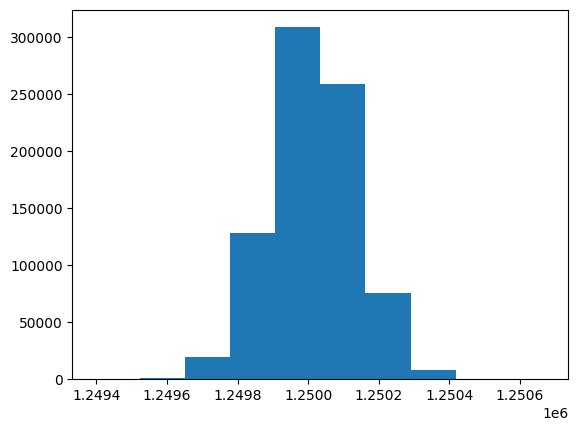

In [7]:
plt.hist(period_Ch1)